Importing necessary libraries and dependencies

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load excel file
file_path = '/content/ECOMM DATA.xlsx'
orders_df = pd.read_excel(file_path, sheet_name='Orders')
returns_df = pd.read_excel(file_path, sheet_name='Returns')
people_df = pd.read_excel(file_path, sheet_name='People')

In [6]:
# Initial exploration of orders sheet
print(orders_df.head())

   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology  Accessories

In [7]:
print(returns_df.head())

  Returned         Order ID         Market
0      Yes   MX-2013-168137          LATAM
1      Yes   US-2011-165316          LATAM
2      Yes  ES-2013-1525878             EU
3      Yes   CA-2013-118311  United States
4      Yes  ES-2011-1276768             EU


In [8]:
print(people_df.head())

              Person   Region
0      Anna Andreadi  Central
1        Chuck Magee    South
2     Kelly Williams     East
3     Matt Collister     West
4  Deborah Brumfield   Africa


In [9]:
# Identify and Handle Missing Values of orders sheet
print(orders_df.isnull().sum())

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [10]:
# Drop missing values
orders_df = orders_df.dropna()

In [11]:
# Checking whether missing values is removed
print(orders_df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


In [12]:
print(returns_df.isnull().sum())
print(people_df.isnull().sum())

Returned    0
Order ID    0
Market      0
dtype: int64
Person    0
Region    0
dtype: int64


In [13]:
# Remove duplicates
# Remove duplicates
orders_df = orders_df.drop_duplicates()
returns_df = returns_df.drop_duplicates()
people_df = people_df.drop_duplicates()

In [14]:
# Displaying the data after removing duplicates
print(orders_df)
print(returns_df)
print(people_df)

       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0       32298  CA-2012-124891 2012-07-31 2012-07-31        Same Day   
8       40155  CA-2014-135909 2014-10-14 2014-10-21  Standard Class   
9       40936  CA-2012-116638 2012-01-28 2012-01-31    Second Class   
10      34577  CA-2011-102988 2011-04-05 2011-04-09    Second Class   
16      36178  CA-2014-143567 2014-11-03 2014-11-06    Second Class   
...       ...             ...        ...        ...             ...   
51270   38414  CA-2011-143168 2011-10-18 2011-10-23    Second Class   
51276   31558  US-2014-155299 2014-06-09 2014-06-13  Standard Class   
51277   37361  CA-2012-111780 2012-12-25 2012-12-30    Second Class   
51286   35398  US-2014-102288 2014-06-20 2014-06-24  Standard Class   
51287   40470  US-2013-155768 2013-12-02 2013-12-02        Same Day   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New York City   
8        JW-1

Data *Sanitization*




In [15]:
# Standardize column names
orders_df.columns = orders_df.columns.str.strip().str.lower().str.replace(' ', '_')
returns_df.columns = returns_df.columns.str.strip().str.lower().str.replace(' ', '_')
people_df.columns = people_df.columns.str.strip().str.lower().str.replace(' ', '_')

In [16]:
print(orders_df.columns)
print(returns_df.columns)
print(people_df.columns)

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')
Index(['returned', 'order_id', 'market'], dtype='object')
Index(['person', 'region'], dtype='object')


Data Analysis

In [17]:
# Finding the total sales
total_sales = orders_df['sales'].sum()
print(f"Total Sales: {total_sales}")

Total Sales: 2297200.8603


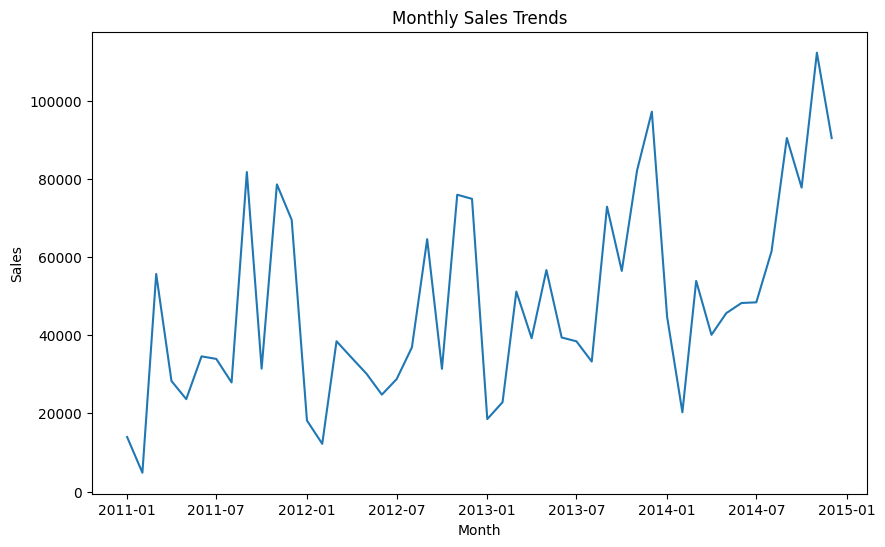

In [18]:
# Sales Trends Over Time

# Converting 'order_date' to datetime
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])

# Group by month and sum sales
monthly_sales = orders_df.groupby(orders_df['order_date'].dt.to_period('M'))['sales'].sum()

# Convert PeriodIndex to a DatetimeIndex
monthly_sales.index = monthly_sales.index.to_timestamp()

# Data Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

product_name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: sales, dtype: float64


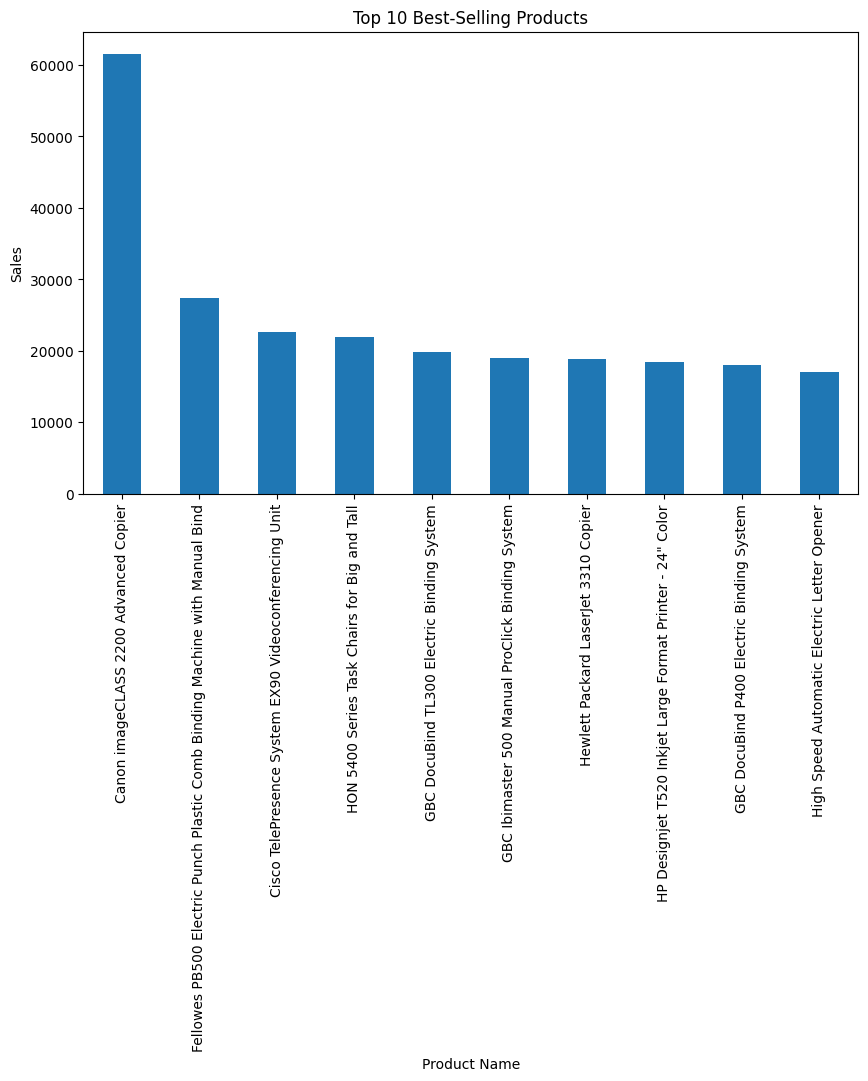

In [19]:
# Analysis for best selling products

best_selling_products = orders_df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)
print(best_selling_products)


best_selling_products.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.show()

In [20]:
# Analyzing Returns

# Merge orders with returns to identify returned products
merged_data = pd.merge(orders_df, returns_df, on=['order_id', 'market'], how='left', indicator=True)
returned_orders = merged_data[merged_data['returned'].notnull()]


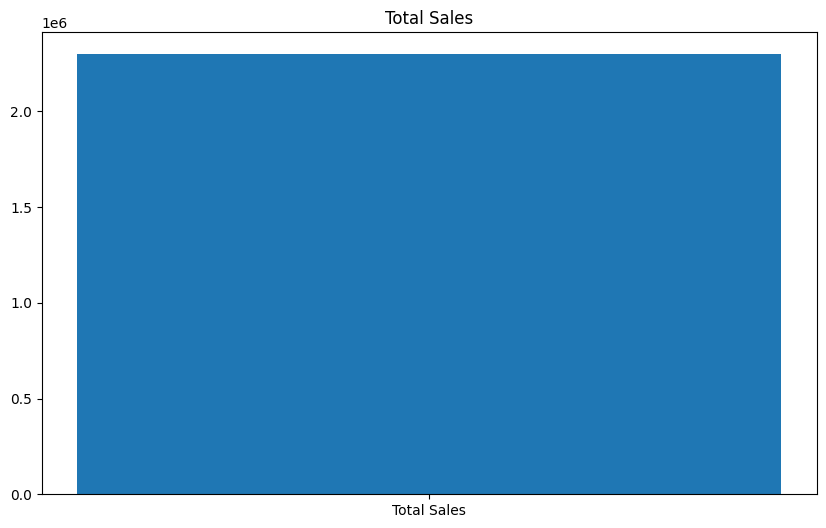

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(['Total Sales'], [total_sales])
plt.title('Total Sales')
plt.show()